In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_processing as data
import HBA_analysis as hba
import plotting
%matplotlib inline

In [3]:
negraes = data.get_genelist('negraes')
duncan = data.get_genelist('duncan')
lutterAN = data.get_genelist('lutterAN')
lutterBN = data.get_genelist('lutterBN')

In [4]:
adult_exp = data.get_dataset(dataset='adult', probes_strategy='reannotator')
fetal_exp = data.get_dataset(dataset='fetal', probes_strategy='reannotator')

Processed HBA brain dataset found locally. Loading from data/processed/adult_brainarea_vs_genes_exp_reannotator.tsv
Processed HBA brain dataset found locally. Loading from data/processed/fetal_brainarea_vs_genes_exp_reannotator.tsv


# Results with Negraes gene list
## Adult human brain data

In [5]:
brain_areas = ['lateral parabrachial nucleus', 'medial parabrachial nucleus',
               'paraventricular nucleus of the hypothalamus', 'arcuate nucleus of the hypothalamus',
               'pontine raphe nucleus', 'subcallosal cingulate gyrus', 'nucleus accumbens', 
               'ventral tegmental area', 'central nucleus', 'bed  nucleus of stria terminalis']

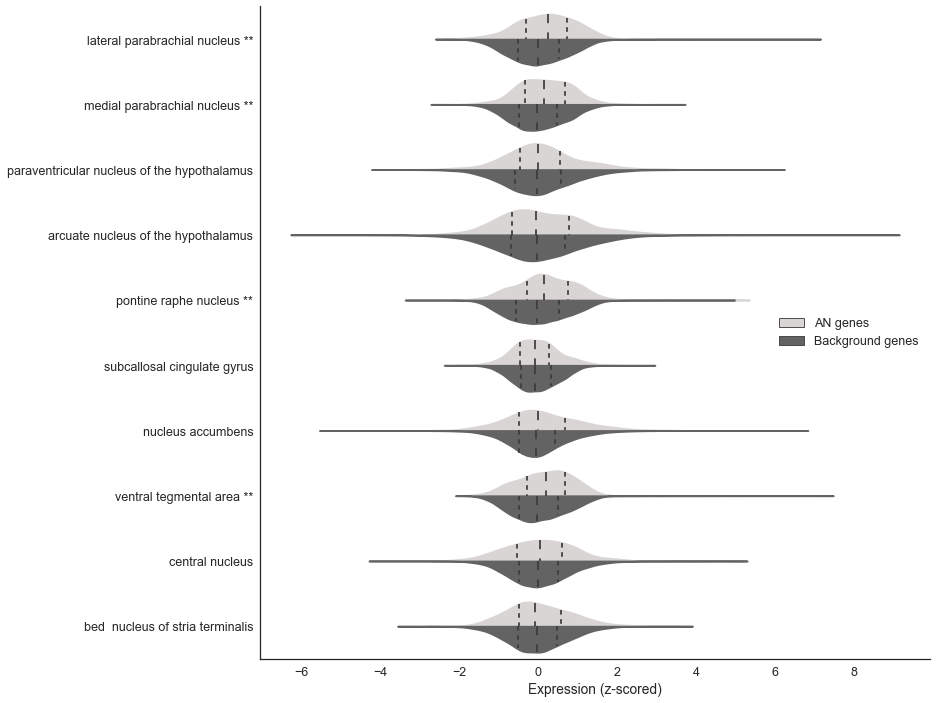

In [6]:
brain_area_labels = ['lateral parabrachial nucleus **', 'medial parabrachial nucleus **',
               'paraventricular nucleus of the hypothalamus', 'arcuate nucleus of the hypothalamus',
               'pontine raphe nucleus **', 'subcallosal cingulate gyrus', 'nucleus accumbens', 
               'ventral tegmental area **', 'central nucleus', 'bed  nucleus of stria terminalis']
sns.set_style("white")
plotting.make_violins(adult_exp, brain_areas, negraes, brain_area_labels)

## Fetal brain data

In [7]:
# subgenual cingulate and central amygdala have multiple subsamples
subgenual_cingulate_cortex = ['IZ in subgenual (subcallosal) cingulate cortex', 'VZ in subgenual cingulate neocortex',
                              'SZ in subgenual cingulate cortex', 'SP in subgenual (subcallosal) cingulate cortex',
                              'outer CP in subgenual (subcallosal) cingulate cortex',
                              'inner CP in subgenual (subcallosal) cingulate cortex']

central_amygdala = ['central nuclear group',
                    'medial subdivision of central nucleus']

# generate new columns that are aggregates of smaller sampled areas
fetal_exp['subgenual_cingulate_cortex'] = fetal_exp.loc[:, subgenual_cingulate_cortex].mean(axis=1)
fetal_exp['central_amygdala'] = fetal_exp.loc[:, central_amygdala].mean(axis=1)

In [8]:
# slight differences in naming conventions in comparison to adult...
fetal_brain_areas = ['lateral parabrachial nucleus', 'medial parabrachial nucleus',
                     'paraventricular nucleus of hypothalamus', 'arcuate nucleus of hypothalamus',
                     'raphe magnus nucleus', 'raphe obscurus nucleus', 'solitary nucleus',
                     'core of nucleus accumbens', 'ventral tegmental area',
                     'bed nucleus of stria terminalis', 'subgenual_cingulate_cortex', 'central_amygdala']

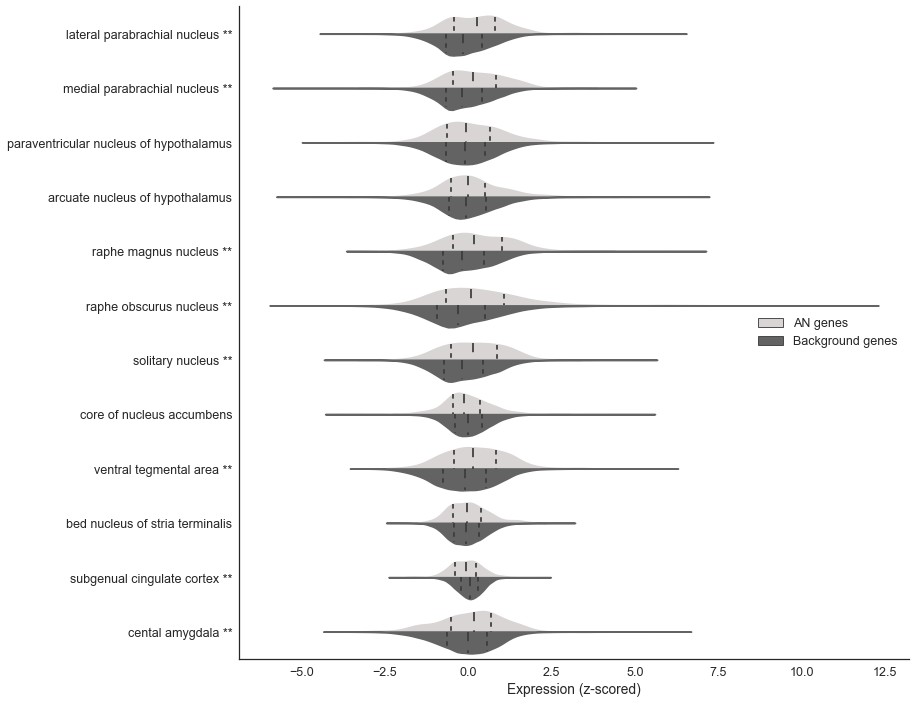

In [9]:
labels = ['lateral parabrachial nucleus **', 'medial parabrachial nucleus **', 'paraventricular nucleus of hypothalamus', 'arcuate nucleus of hypothalamus',
          'raphe magnus nucleus **', 'raphe obscurus nucleus **', 'solitary nucleus **', 'core of nucleus accumbens',
          'ventral tegmental area **', 'bed nucleus of stria terminalis', 'subgenual cingulate cortex **', 
          'cental amygdala **']

plotting.make_violins(fetal_exp, fetal_brain_areas, negraes, brain_area_labels=labels)

# Results with Duncan gene list
## The following cells should have the stats (pvalues) done with R, since the gene list contains only 6 genes (<20)
due to known approximation in SciPy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

## Adult human data

In [10]:
results_adult_duncan = hba.generate_stats_table(exp_df=adult_exp, gene_list=duncan)

You submitted a gene list with 6 genes.
    6 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [11]:
results_adult_duncan.loc[brain_areas, :]

,p,pFDR,AUROC
lateral parabrachial nucleus,0.043252,0.856897,0.738253
medial parabrachial nucleus,0.486636,0.997377,0.582003
paraventricular nucleus of the hypothalamus,0.833351,0.997377,0.475195
arcuate nucleus of the hypothalamus,0.967428,0.997377,0.504817
pontine raphe nucleus,0.544962,0.997377,0.571354
subcallosal cingulate gyrus,0.708294,0.997377,0.544105
nucleus accumbens,0.452709,0.997377,0.588514
ventral tegmental area,0.110993,0.975949,0.687860
central nucleus,0.786968,0.997377,0.531859
bed nucleus of stria terminalis,0.734426,0.997377,0.539991


## Fetal human data

In [12]:
results_fetal_duncan = hba.generate_stats_table(exp_df=fetal_exp, gene_list=duncan)

You submitted a gene list with 6 genes.
    6 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [13]:
results_fetal_duncan.loc[fetal_brain_areas, :]

,p,pFDR,AUROC
lateral parabrachial nucleus,0.947719,0.974044,0.492267
medial parabrachial nucleus,0.310030,0.922964,0.380338
paraventricular nucleus of hypothalamus,0.524405,0.971767,0.575037
arcuate nucleus of hypothalamus,0.080311,0.646235,0.706146
raphe magnus nucleus,0.880162,0.971767,0.517775
raphe obscurus nucleus,0.511287,0.971767,0.422574
solitary nucleus,0.344134,0.952982,0.388487
core of nucleus accumbens,0.855736,0.971767,0.521433
ventral tegmental area,0.093005,0.669121,0.697998
bed nucleus of stria terminalis,0.817992,0.971767,0.472871


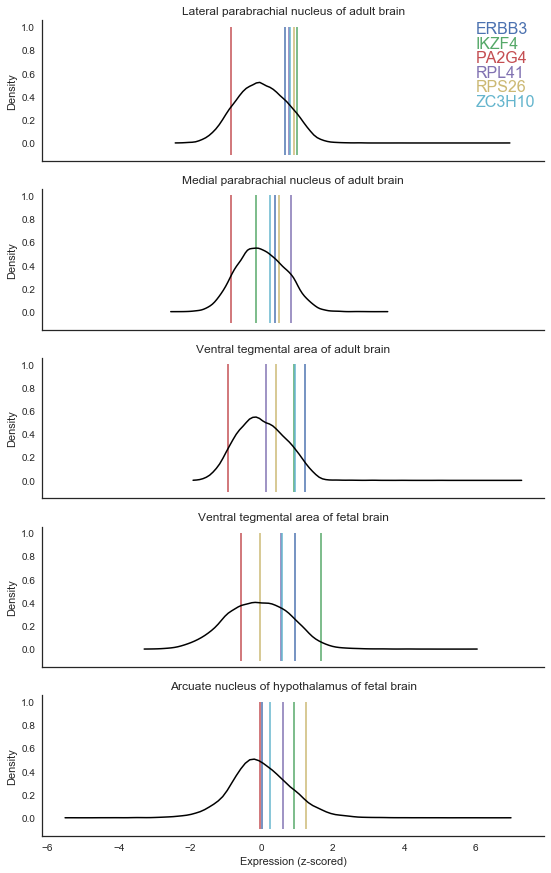

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharey=True, sharex=True, figsize=(9,15))
plotting.make_dist_plot(adult_exp, 'lateral parabrachial nucleus', duncan, gene_text=True, ax=ax1)
plotting.make_dist_plot(adult_exp, 'medial parabrachial nucleus', duncan, gene_text=False, ax=ax2)
plotting.make_dist_plot(adult_exp, 'ventral tegmental area', duncan, gene_text=False, ax=ax3)
plotting.make_dist_plot(fetal_exp, 'ventral tegmental area', duncan, gene_text=False, ax=ax4)
plotting.make_dist_plot(fetal_exp, 'arcuate nucleus of hypothalamus', duncan, gene_text=False, ax=ax5)
#plt.text()
ax1.set_title('Lateral parabrachial nucleus of adult brain')
ax2.set_title('Medial parabrachial nucleus of adult brain')
ax3.set_title('Ventral tegmental area of adult brain')
ax4.set_title('Ventral tegmental area of fetal brain')
ax5.set_title('Arcuate nucleus of hypothalamus of fetal brain')
ax5.set_xlabel('Expression (z-scored)')
#fig.tight_layout()

# Results with Lutter gene lists
## Adult human data

In [15]:
results_lutterAN_adult = hba.generate_stats_table(adult_exp, gene_list=lutterAN)

You submitted a gene list with 51 genes.
    51 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [16]:
results_lutterAN_adult.loc[brain_areas, :]

,p,pFDR,AUROC
lateral parabrachial nucleus,0.047708,0.593068,0.580136
medial parabrachial nucleus,0.057192,0.593068,0.576974
paraventricular nucleus of the hypothalamus,0.549105,0.830265,0.524248
arcuate nucleus of the hypothalamus,0.750763,0.916722,0.487144
pontine raphe nucleus,0.181308,0.593068,0.554102
subcallosal cingulate gyrus,0.470123,0.790352,0.470767
nucleus accumbens,0.050829,0.593068,0.579041
ventral tegmental area,0.085458,0.593068,0.569608
central nucleus,0.176009,0.593068,0.554766
bed nucleus of stria terminalis,0.012347,0.593068,0.601267


In [17]:
results_lutterBN_adult = hba.generate_stats_table(adult_exp, gene_list=lutterBN)

You submitted a gene list with 80 genes.
    80 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [18]:
results_lutterBN_adult.loc[brain_areas, :]

,p,pFDR,AUROC
lateral parabrachial nucleus,0.180089,0.611085,0.456652
medial parabrachial nucleus,0.018439,0.577450,0.423790
paraventricular nucleus of the hypothalamus,0.314945,0.669195,0.467504
arcuate nucleus of the hypothalamus,0.578141,0.808004,0.482017
pontine raphe nucleus,0.609642,0.826589,0.483489
subcallosal cingulate gyrus,0.969550,0.990592,0.501235
nucleus accumbens,0.023868,0.577450,0.426941
ventral tegmental area,0.445289,0.769607,0.475317
central nucleus,0.061175,0.577450,0.439456
bed nucleus of stria terminalis,0.069811,0.577450,0.441367


## Fetal human data

In [19]:
results_lutterAN_fetal = hba.generate_stats_table(fetal_exp, gene_list=lutterAN)

You submitted a gene list with 51 genes.
    51 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [20]:
results_lutterAN_fetal.loc[fetal_brain_areas, :]

,p,pFDR,AUROC
lateral parabrachial nucleus,0.104182,0.987354,0.565766
medial parabrachial nucleus,0.405066,0.987354,0.533699
paraventricular nucleus of hypothalamus,0.584269,0.987354,0.522146
arcuate nucleus of hypothalamus,0.785713,0.992928,0.511004
raphe magnus nucleus,0.243033,0.987354,0.547250
raphe obscurus nucleus,0.572479,0.987354,0.522844
solitary nucleus,0.393830,0.987354,0.534512
core of nucleus accumbens,0.195677,0.987354,0.552371
ventral tegmental area,0.341208,0.987354,0.538522
bed nucleus of stria terminalis,0.514582,0.987354,0.526378


In [21]:
results_lutterBN_fetal = hba.generate_stats_table(fetal_exp, gene_list=lutterBN)

You submitted a gene list with 80 genes.
    80 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [22]:
results_lutterAN_fetal.loc[fetal_brain_areas, :]

,p,pFDR,AUROC
lateral parabrachial nucleus,0.104182,0.987354,0.565766
medial parabrachial nucleus,0.405066,0.987354,0.533699
paraventricular nucleus of hypothalamus,0.584269,0.987354,0.522146
arcuate nucleus of hypothalamus,0.785713,0.992928,0.511004
raphe magnus nucleus,0.243033,0.987354,0.547250
raphe obscurus nucleus,0.572479,0.987354,0.522844
solitary nucleus,0.393830,0.987354,0.534512
core of nucleus accumbens,0.195677,0.987354,0.552371
ventral tegmental area,0.341208,0.987354,0.538522
bed nucleus of stria terminalis,0.514582,0.987354,0.526378


# SVG mapping

In [23]:
from IPython.display import SVG

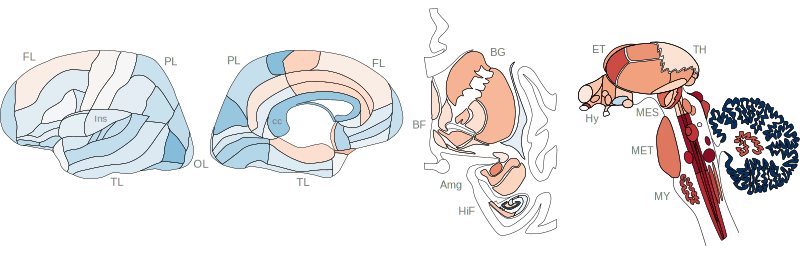

In [24]:
SVG(filename='./figures/human_diagram.svg')

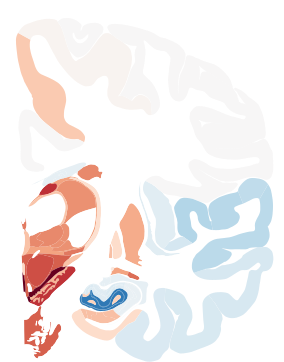

In [25]:
SVG(filename='./figures/colourized_1532_112360908.svg')

# Supplemental
Tables with expression levels of disease gene lists in the areas of interest

In [26]:
#union of gene_lists
genelist_union = pd.concat([negraes, duncan, lutterAN])

In [27]:
duplicated = genelist_union[genelist_union.duplicated()]

In [28]:
duplicated

16        GIPC3
19        IFIT3
38      SCGB1A1
44    TNFRSF10A
Name: 0, dtype: object

### Duplicated genes across gene lists (all 4 in Negraes and LutterAN)
- TNFRSF10A 
http://www.genecards.org/cgi-bin/carddisp.pl?gene=TNFRSF10A
- SCGB1A1 
http://www.genecards.org/cgi-bin/carddisp.pl?gene=SCGB1A1
- IFIT3 
http://www.genecards.org/cgi-bin/carddisp.pl?gene=IFIT3
- GIPC3 
http://www.genecards.org/cgi-bin/carddisp.pl?gene=GIPC3

In [29]:
genelist_union = genelist_union.drop_duplicates()

In [30]:
genelist_union.shape

(413,)

In [31]:
def generate_supp_table(gene_list):
    supp_table_adult = adult_exp.loc[adult_exp.index.isin(gene_list), brain_areas]
    supp_table_fetal = fetal_exp.loc[fetal_exp.index.isin(gene_list), fetal_brain_areas]
    supp_table = pd.concat([supp_table_adult, supp_table_fetal.add_prefix('fetal_')], axis=1)
    
    return supp_table

In [32]:
supp_table_lists_union = generate_supp_table(genelist_union)

In [33]:
supp_table_lists_union.insert(0, 'Negraes et al. Table S5', supp_table_lists_union.index.isin(negraes))
supp_table_lists_union.insert(1, 'Duncan et al. rs4622308', supp_table_lists_union.index.isin(duncan))
supp_table_lists_union.insert(2, 'Lutter et al. Table S3.RestrictedEating', supp_table_lists_union.index.isin(lutterAN))
supp_table_lists_union.insert(3, 'Lutter et al. Table S4.BingeEating', supp_table_lists_union.index.isin(lutterBN))


In [34]:
supp_table_lists_union

,Negraes et al. Table S5,Duncan et al. rs4622308,Lutter et al. Table S3.RestrictedEating,Lutter et al. Table S4.BingeEating,lateral parabrachial nucleus,medial parabrachial nucleus,paraventricular nucleus of the hypothalamus,arcuate nucleus of the hypothalamus,pontine raphe nucleus,subcallosal cingulate gyrus,...,fetal_paraventricular nucleus of hypothalamus,fetal_arcuate nucleus of hypothalamus,fetal_raphe magnus nucleus,fetal_raphe obscurus nucleus,fetal_solitary nucleus,fetal_core of nucleus accumbens,fetal_ventral tegmental area,fetal_bed nucleus of stria terminalis,fetal_subgenual_cingulate_cortex,fetal_central_amygdala
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ABCA12,True,False,False,False,-0.559354,-0.712071,-0.594848,-0.172974,-1.121771,0.313243,...,-0.258525,-0.071422,-0.498300,-0.662835,-0.871649,0.223315,0.901787,-0.307584,0.946788,-1.182149
ABCC6P2,True,False,False,False,-0.612350,1.020678,0.920739,0.857978,0.769541,-0.054940,...,-0.777895,-0.832635,-0.736371,-1.526651,-1.575547,0.174622,0.107702,-0.102345,-0.027777,-1.540131
ACTG1,False,False,True,False,-0.410066,-1.046665,0.169894,-0.666537,-0.388181,1.222722,...,0.470569,-0.013390,0.119645,-0.615935,0.075387,1.025118,0.126828,0.255389,-0.531451,0.206124
ADAM20,True,False,False,False,0.154131,1.043086,0.197874,-0.705747,0.029428,-1.150896,...,-0.628125,-0.695882,-1.960607,-1.985197,0.830027,0.261494,-1.111818,-0.443833,0.157226,1.047889
ADGB,False,False,True,False,-0.330958,-0.436344,0.026560,-0.035873,0.168209,0.169317,...,-0.414775,1.074389,-0.944742,2.045464,-1.376906,-0.020343,-0.867916,-0.787057,0.164913,-1.082020
ADH1A,True,False,False,False,0.278263,0.898551,-0.036580,1.195780,1.236346,-0.605141,...,-0.627738,-0.366487,-0.399877,-1.342545,-0.303623,-0.221639,0.246612,0.267469,0.231912,1.008293
AFP,True,False,False,False,-0.698442,-0.533482,-0.581481,-0.359480,-1.015436,0.056204,...,-0.622826,-0.367151,1.514649,0.426218,-1.166893,0.064967,-0.438811,-0.492653,0.111331,-1.522974
AGAP1,True,False,False,False,-0.062810,0.393133,-2.122659,-1.828723,0.337090,0.424525,...,0.162984,0.365604,-0.535421,-1.188954,-0.310389,0.265509,-0.058156,-0.315853,-0.088900,0.446583
AGER,True,False,False,False,1.093896,0.646893,0.063726,-0.192961,0.795633,-0.858010,...,-0.151428,0.247384,-1.276175,-0.681414,-2.726355,0.077907,1.215840,0.547752,0.063228,-2.454224


In [35]:
#supp_table_lists_union.to_csv('./results/supp_expression_table.csv')

### Negraes

In [36]:
supp_table_negraes = generate_supp_table(negraes)

In [37]:
supp_table_negraes

,lateral parabrachial nucleus,medial parabrachial nucleus,paraventricular nucleus of the hypothalamus,arcuate nucleus of the hypothalamus,pontine raphe nucleus,subcallosal cingulate gyrus,nucleus accumbens,ventral tegmental area,central nucleus,bed nucleus of stria terminalis,...,fetal_paraventricular nucleus of hypothalamus,fetal_arcuate nucleus of hypothalamus,fetal_raphe magnus nucleus,fetal_raphe obscurus nucleus,fetal_solitary nucleus,fetal_core of nucleus accumbens,fetal_ventral tegmental area,fetal_bed nucleus of stria terminalis,fetal_subgenual_cingulate_cortex,fetal_central_amygdala
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ABCA12,-0.559354,-0.712071,-0.594848,-0.172974,-1.121771,0.313243,0.402755,-0.138900,-0.210532,-0.498686,...,-0.258525,-0.071422,-0.498300,-0.662835,-0.871649,0.223315,0.901787,-0.307584,0.946788,-1.182149
ABCC6P2,-0.612350,1.020678,0.920739,0.857978,0.769541,-0.054940,-0.577562,0.080393,0.306012,0.329328,...,-0.777895,-0.832635,-0.736371,-1.526651,-1.575547,0.174622,0.107702,-0.102345,-0.027777,-1.540131
ADAM20,0.154131,1.043086,0.197874,-0.705747,0.029428,-1.150896,1.181257,0.098900,1.037334,1.641166,...,-0.628125,-0.695882,-1.960607,-1.985197,0.830027,0.261494,-1.111818,-0.443833,0.157226,1.047889
ADH1A,0.278263,0.898551,-0.036580,1.195780,1.236346,-0.605141,-0.124466,0.176496,0.281227,0.534680,...,-0.627738,-0.366487,-0.399877,-1.342545,-0.303623,-0.221639,0.246612,0.267469,0.231912,1.008293
AFP,-0.698442,-0.533482,-0.581481,-0.359480,-1.015436,0.056204,0.090830,-1.057484,-0.255404,-0.438408,...,-0.622826,-0.367151,1.514649,0.426218,-1.166893,0.064967,-0.438811,-0.492653,0.111331,-1.522974
AGAP1,-0.062810,0.393133,-2.122659,-1.828723,0.337090,0.424525,-0.839020,0.669989,-1.011251,-0.585924,...,0.162984,0.365604,-0.535421,-1.188954,-0.310389,0.265509,-0.058156,-0.315853,-0.088900,0.446583
AGER,1.093896,0.646893,0.063726,-0.192961,0.795633,-0.858010,0.415098,0.722640,-0.191306,0.315671,...,-0.151428,0.247384,-1.276175,-0.681414,-2.726355,0.077907,1.215840,0.547752,0.063228,-2.454224
AHNAK2,-0.724079,-0.287177,0.415436,-0.910583,0.889738,-0.241931,-2.512417,0.304888,-1.241854,-1.640919,...,-0.432375,-0.486294,0.543932,-1.144286,0.119444,0.021404,-0.466054,-0.675608,-0.306438,-0.297230
AIFM3,-1.221801,-0.369725,-1.170856,-1.311273,0.012824,-0.275233,-0.912412,-0.429616,-0.938107,-0.174327,...,0.621474,0.278420,2.349122,1.269162,1.340395,0.166424,1.264540,0.643479,-0.445647,0.811018


### Duncan

In [38]:
supp_table_duncan = generate_supp_table(duncan)

In [39]:
supp_table_duncan

,lateral parabrachial nucleus,medial parabrachial nucleus,paraventricular nucleus of the hypothalamus,arcuate nucleus of the hypothalamus,pontine raphe nucleus,subcallosal cingulate gyrus,nucleus accumbens,ventral tegmental area,central nucleus,bed nucleus of stria terminalis,...,fetal_paraventricular nucleus of hypothalamus,fetal_arcuate nucleus of hypothalamus,fetal_raphe magnus nucleus,fetal_raphe obscurus nucleus,fetal_solitary nucleus,fetal_core of nucleus accumbens,fetal_ventral tegmental area,fetal_bed nucleus of stria terminalis,fetal_subgenual_cingulate_cortex,fetal_central_amygdala
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ERBB3,0.661247,0.373928,-1.888387,-1.412723,1.330213,0.276630,-0.254302,1.226852,-0.550565,-0.443735,...,0.245693,0.021274,2.369207,3.566258,1.376182,-0.366959,0.945638,-0.095868,-0.143318,0.389357
IKZF4,0.986611,-0.150791,0.506743,-0.256895,0.009661,-0.726672,0.437727,0.904522,1.394182,1.444088,...,0.592703,0.909517,-1.374154,-1.866793,-0.872138,1.072966,1.673121,1.055293,-0.202876,0.679159
PA2G4,-0.856115,-0.849542,-0.368509,-0.006669,-0.866716,0.521102,0.067137,-0.931605,-0.054376,-0.104163,...,-0.026861,-0.045026,-0.520493,-1.933332,-0.356139,0.252665,-0.581550,-0.483115,0.028721,0.177114
RPL41,0.772547,0.823370,0.440932,1.289113,-0.147966,0.832265,0.338923,0.119169,0.399649,0.320447,...,-0.563359,0.601621,0.107609,1.430187,-0.789449,-0.054926,0.545730,-0.043362,0.351716,0.206713
RPS26,0.921001,0.477865,1.156356,0.882494,0.168678,0.103787,0.779293,0.406141,0.151054,-0.214142,...,0.029264,1.236187,-0.344017,-1.493733,-0.648049,0.308717,-0.030306,-0.184112,-0.301732,-0.478891
ZC3H10,0.802593,0.228357,-0.881801,-0.458202,0.593978,-1.147020,-0.480306,0.943812,-0.547712,-0.228132,...,0.290320,0.244645,0.162424,-0.512118,-0.712832,-0.772114,0.574751,-0.476204,0.437285,-0.996495


### LutterAN

In [40]:
supp_table_lutterAN = generate_supp_table(lutterAN)

In [41]:
supp_table_lutterAN

,lateral parabrachial nucleus,medial parabrachial nucleus,paraventricular nucleus of the hypothalamus,arcuate nucleus of the hypothalamus,pontine raphe nucleus,subcallosal cingulate gyrus,nucleus accumbens,ventral tegmental area,central nucleus,bed nucleus of stria terminalis,...,fetal_paraventricular nucleus of hypothalamus,fetal_arcuate nucleus of hypothalamus,fetal_raphe magnus nucleus,fetal_raphe obscurus nucleus,fetal_solitary nucleus,fetal_core of nucleus accumbens,fetal_ventral tegmental area,fetal_bed nucleus of stria terminalis,fetal_subgenual_cingulate_cortex,fetal_central_amygdala
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ACTG1,-0.410066,-1.046665,0.169894,-0.666537,-0.388181,1.222722,0.634316,0.235517,-0.393077,0.031766,...,0.470569,-0.013390,0.119645,-0.615935,0.075387,1.025118,0.126828,0.255389,-0.531451,0.206124
ADGB,-0.330958,-0.436344,0.026560,-0.035873,0.168209,0.169317,0.149273,-0.200319,0.231140,0.391351,...,-0.414775,1.074389,-0.944742,2.045464,-1.376906,-0.020343,-0.867916,-0.787057,0.164913,-1.082020
AIF1L,0.541099,0.495290,-1.181708,-1.971340,0.749631,0.451704,-0.118215,0.776479,-0.793321,-0.425650,...,-0.047505,0.257264,0.846994,0.591476,0.227828,-1.274082,0.909446,-0.089349,0.254263,-0.192238
ARHGAP1,-0.031533,-0.165697,-0.792273,-0.157386,0.250289,0.654680,-0.048989,0.309173,-0.212987,0.320868,...,0.374273,0.404472,-0.658989,-0.859392,0.080155,0.134193,0.415480,-0.527526,-0.361696,0.105831
BVES,0.888234,0.791449,-0.462185,0.134719,1.085302,-0.199041,0.287308,1.325033,-0.308528,0.378242,...,-0.305400,-0.299957,1.304751,0.374378,0.173135,-0.394734,1.591896,0.337784,-0.300701,0.139038
C12orf75,0.990801,0.900151,1.366779,1.324861,0.744445,-0.111192,0.771957,0.277688,1.623856,1.236015,...,-0.877232,0.196984,0.494910,1.930631,0.569483,0.521972,0.610389,0.781875,-0.796965,1.055031
C6orf223,0.028947,0.493162,0.672735,-0.370615,-0.176437,0.080900,-1.040117,0.436295,-0.146673,0.464611,...,-0.896932,-0.924073,0.021072,-1.446619,-0.746962,0.524778,-0.187612,-0.814549,-0.016358,-0.293569
CCNO,0.121924,0.182699,-0.221439,0.324237,-0.116729,-0.001473,1.588861,-1.222002,0.633063,0.566479,...,1.769815,-0.583764,0.342857,-0.602506,-0.032990,1.297903,-0.479288,-0.180028,0.111652,0.216131
CNOT7,0.677096,-0.164098,1.248074,2.109098,-0.625040,0.609314,1.176723,-0.242938,0.712305,0.201005,...,-0.268980,1.809305,-0.727760,-0.812950,-1.074738,0.901233,-1.400814,1.079328,0.418867,0.034156


## Looking at top genes for interesting notes for discussion:
### negraes META
- RAMP1: http://www.genecards.org/cgi-bin/carddisp.pl?gene=RAMP1
- CXCL2: http://www.genecards.org/cgi-bin/carddisp.pl?gene=CXCL2

### Negraes in LPBN
- CALCB (CGRP beta): http://www.genecards.org/cgi-bin/carddisp.pl?gene=CALCB
- LY86: http://www.genecards.org/cgi-bin/carddisp.pl?gene=LY86
- HLA-DQB1: http://www.genecards.org/cgi-bin/carddisp.pl?gene=HLA-DQB1

### LutterAN in LPBN
- LILRA1(LutterAN): http://www.genecards.org/cgi-bin/carddisp.pl?gene=LILRA1
- SCGB1A1(present in negraes list as well) http://www.genecards.org/cgi-bin/carddisp.pl?gene=SCGB1A1

In [42]:
adult_union_lists = supp_table_lists_union[supp_table_negraes.columns[~supp_table_negraes.columns.str.startswith('fetal')]]
fetal_union_lists = supp_table_lists_union[supp_table_negraes.columns[supp_table_negraes.columns.str.startswith('fetal')]]

In [43]:
#union of lists
supp_table_lists_union.rank().sum(axis=1).sort_values(ascending=False)

gene_symbol
CFC1B        6933.5
CFC1         6868.5
C10orf105    6836.5
TAC1         6709.5
NPPB         6523.5
RAMP1        6505.5
OTP          6499.5
NAP1L5       6397.5
PIRT         6394.5
MT1G         6360.5
PI16         6323.5
GPR149       6229.5
DIO3         6210.5
NUPR1L       6166.5
HP           6150.5
RBP4         6149.5
GAL3ST1      6115.5
C12orf75     6105.5
SYT10        6055.5
PLB1         6027.5
S100B        6021.5
ARMC3        6020.5
HES5         5976.5
HLA-DQB1     5968.5
NTS          5919.5
PNMA3        5876.5
DMKN         5842.5
OMG          5838.5
PLCH1        5836.5
SLITRK2      5835.5
              ...  
ZNF835       3147.5
PA2G4        3143.5
CASP5        3136.5
ATP8B1       3126.5
FOXD4        3123.5
PRSS16       3119.5
AHNAK2       3115.5
HRH2         3088.5
MPZ          3077.5
SPATA21      3014.5
NAIP         2999.5
SLC22A14     2990.5
HPS3         2989.5
PTX3         2977.5
LRRC66       2961.5
NEUROG1      2908.5
PLCZ1        2908.5
GJB5         2907.5
EXTL3   

In [44]:
adult_union_lists.rank().sum(axis=1).sort_values(ascending=False)

gene_symbol
C10orf105    3004.0
TTPA         2798.0
MT1G         2772.0
EPS8         2764.0
GPR149       2742.0
C12orf75     2720.0
ITGB3        2684.0
MRPL23       2675.0
CXCL2        2658.0
IFIT3        2643.0
CFC1B        2627.0
SYT10        2610.0
MRVI1        2605.0
TEPP         2595.0
TAC1         2595.0
MIR137HG     2583.0
C1orf94      2576.0
HP           2564.0
FOS          2556.0
CFC1         2553.0
POFUT2       2551.0
PIRT         2532.0
LY86         2532.0
RBP4         2528.0
RPS2P32      2490.0
SPATA13      2479.0
PAIP1        2476.0
C6orf25      2472.0
SLITRK2      2468.0
HES5         2464.0
              ...  
ROR1          873.0
FAM135B       866.0
PLCZ1         862.0
PCDHA11       846.0
CALML3        833.0
COLGALT2      831.0
HABP2         819.0
TMEM244       817.0
NIPAL2        811.0
LURAP1L       798.0
SLC22A14      785.0
UNC5B         781.0
DEFB1         773.0
TNFRSF11B     752.0
LINC00599     743.0
KCNK12        741.0
BDNF          723.0
AIFM3         714.0
SEMA4C  

In [45]:
fetal_union_lists.rank().sum(axis=1).sort_values(ascending=False)

gene_symbol
CFC1         3632.0
CFC1B        3623.0
RAMP1        3474.0
OTP          3455.0
TAC1         3431.0
NAP1L5       3429.0
DIO3         3420.0
NPPB         3417.0
S100B        3299.0
PNMA3        3231.0
NUPR1L       3231.0
GAL3ST1      3227.0
PI16         3222.0
AIFM3        3195.0
PLCH1        3183.0
PIRT         3179.0
DMKN         3159.0
C10orf105    3149.0
HLA-DQB1     3132.0
KCNS2        3112.0
DGKG         3093.0
OMG          3052.0
NTS          3024.0
GLIPR1       3001.0
LINC01106    2989.0
RRAD         2979.0
SH3D19       2958.0
VSTM1        2951.0
RBP4         2938.0
GRIK1        2937.0
              ...  
HIST1H4H     1251.0
ZNF716       1246.0
SLC34A2      1236.0
NEUROG1      1232.0
EVX1         1219.0
ZNF441       1214.0
ZNF728       1207.0
EXTL3        1205.0
LINC00032    1192.0
LINC00115    1181.0
CDCP2        1177.0
MPZ          1176.0
CASP5        1169.0
SPATA21      1149.0
PTX3         1145.0
KRT32        1107.0
SEMA4C       1094.0
ROR1         1091.0
HIST1H2A

In [46]:
supp_negraes_adult = supp_table_negraes[supp_table_negraes.columns[~supp_table_negraes.columns.str.startswith('fetal')]]

In [47]:
supp_negraes_fetal = supp_table_negraes[supp_table_negraes.columns[supp_table_negraes.columns.str.startswith('fetal')]]

In [48]:
supp_negraes_adult.rank().sum(axis=1).sort_values(ascending=False)[:10]

gene_symbol
C10orf105    2538.0
TTPA         2364.0
MT1G         2338.0
EPS8         2326.0
GPR149       2314.0
ITGB3        2268.0
MRPL23       2255.0
CXCL2        2252.0
IFIT3        2229.0
CFC1B        2220.0
dtype: float64

In [49]:
supp_negraes_fetal.rank().sum(axis=1).sort_values(ascending=False)[:10]

gene_symbol
CFC1       3066.0
CFC1B      3057.0
RAMP1      2932.0
OTP        2926.0
DIO3       2885.0
NAP1L5     2882.0
TAC1       2872.0
S100B      2769.0
GAL3ST1    2718.0
PNMA3      2714.0
dtype: float64

In [50]:
supp_table_negraes.rank().sum(axis=1).sort_values(ascending=False)

gene_symbol
CFC1B        5277.0
CFC1         5221.0
C10orf105    5191.0
TAC1         5065.0
OTP          4932.0
RAMP1        4916.0
PIRT         4824.0
NAP1L5       4816.0
MT1G         4763.0
PI16         4751.0
DIO3         4674.0
GPR149       4656.0
NUPR1L       4625.0
RBP4         4598.0
GAL3ST1      4588.0
SYT10        4526.0
PLB1         4523.0
S100B        4505.0
ARMC3        4488.0
HLA-DQB1     4457.0
HES5         4454.0
PNMA3        4385.0
DMKN         4350.0
OMG          4340.0
PLCH1        4332.0
SLITRK2      4329.0
SCRG1        4293.0
SLC32A1      4286.0
HTR7P1       4240.0
TMEM215      4232.0
              ...  
LINC00115    2154.0
TNFRSF10A    2134.0
PROKR1       2112.0
LEKR1        2103.0
ALMS1        2102.0
ZNF441       2091.0
ZNF835       2085.0
CASP5        2072.0
FOXD4        2067.0
AHNAK2       2054.0
ATP8B1       2052.0
PRSS16       2048.0
HRH2         2032.0
MPZ          2023.0
SPATA21      1977.0
NAIP         1957.0
PTX3         1936.0
HPS3         1934.0
SLC22A14

In [51]:
#looking thru top with negraes
total_genes_negraes = {}
for brain_area in brain_areas:
    print(brain_area)
    top10 = supp_table_negraes.loc[:, brain_area].sort_values(ascending=False).head(20)
    print(top10)
    total_genes_negraes[brain_area]=top10.index
    print('--------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------')

lateral parabrachial nucleus
gene_symbol
LY86        1.641695
DBX1        1.615279
CALCB       1.610778
THBS1       1.531691
TMEM37      1.525539
PAX5        1.523586
LPCAT2      1.487153
PRRX2       1.463928
RXFP2       1.448562
RCAN1       1.400379
SLC17A6     1.398382
CECR1       1.355726
C1orf94     1.353990
PROKR1      1.334114
PCSK6       1.307853
HLA-DQB1    1.296533
TEPP        1.276927
PIRT        1.276233
TYW3        1.242856
CFC1B       1.237822
Name: lateral parabrachial nucleus, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
medial parabrachial nucleus
gene_symbol
CALCB        2.024742
C6orf25      1.869926
LY86         1.647433
HLA-DQB1     1.469870
RPL23AP53    1.466946
LPCAT2       1.432544
PAX5         1.431408
EPS8         1.397299
HCLS1        1.396611
MRPL23       1.381897
SLC17A6      1.342059
C10orf105    1.300581
DNAJB13      1.263505


In [52]:
top_genes_negraes = pd.DataFrame(total_genes_negraes)

In [53]:
top_genes_negraes

,arcuate nucleus of the hypothalamus,bed nucleus of stria terminalis,central nucleus,lateral parabrachial nucleus,medial parabrachial nucleus,nucleus accumbens,paraventricular nucleus of the hypothalamus,pontine raphe nucleus,subcallosal cingulate gyrus,ventral tegmental area
0,OTP,TMEM215,TMEM215,LY86,CALCB,RXFP2,OTP,SLC6A5,MS4A8,FOXA1
1,CFC1B,DIO3,NNAT,DBX1,C6orf25,PLB1,CFC1,PMFBP1,CTGF,TFF3
2,CFC1,CXCL2,REM1,CALCB,LY86,NNAT,CFC1B,SALL3,PLB1,PCSK6
3,THNSL2,ARMC3,SLC32A1,THBS1,HLA-DQB1,ANKRD20A5P,TEPP,F5,LPAR3,PAPPA
4,CXCL2,HES5,MIR137HG,TMEM37,RPL23AP53,DIO3,HLA-H,OTP,ANXA1,PAX5
5,FABP12,NNAT,SYT10,PAX5,LPCAT2,GPR149,HLA-F,PIRT,PGPEP1L,TMEM37
6,RPS2P32,SLC32A1,SLFN5,LPCAT2,PAX5,SLC32A1,CXCL2,LPCAT2,TEPP,LMCD1
7,ITK,SYT10,TEK,PRRX2,EPS8,POU3F1,CALCB,VCAN,ARMC3,LPCAT2
8,HES5,RAMP1,TTPA,RXFP2,HCLS1,GPR1,SYT10,SLFN5,NPPA,C10orf105
9,TEPP,GPR149,VCAN,RCAN1,MRPL23,ARMC3,HES5,PCSK6,NNAT,HBEGF


In [54]:
#looking thru top with duncan
total_genes_duncan = {}
for brain_area in brain_areas:
    print(brain_area)
    top10 = supp_table_duncan.loc[:, brain_area].sort_values(ascending=False).head(20)
    print(top10)
    total_genes_duncan[brain_area]=top10.index
    print('--------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------')

lateral parabrachial nucleus
gene_symbol
IKZF4     0.986611
RPS26     0.921001
ZC3H10    0.802593
RPL41     0.772547
ERBB3     0.661247
PA2G4    -0.856115
Name: lateral parabrachial nucleus, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
medial parabrachial nucleus
gene_symbol
RPL41     0.823370
RPS26     0.477865
ERBB3     0.373928
ZC3H10    0.228357
IKZF4    -0.150791
PA2G4    -0.849542
Name: medial parabrachial nucleus, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
paraventricular nucleus of the hypothalamus
gene_symbol
RPS26     1.156356
IKZF4     0.506743
RPL41     0.440932
PA2G4    -0.368509
ZC3H10   -0.881801
ERBB3    -1.888387
Name: paraventricular nucleus of the hypothalamus, dtype: float64
------------------------------

In [55]:
top_genes_duncan = pd.DataFrame(total_genes_duncan)

In [56]:
top_genes_duncan

,arcuate nucleus of the hypothalamus,bed nucleus of stria terminalis,central nucleus,lateral parabrachial nucleus,medial parabrachial nucleus,nucleus accumbens,paraventricular nucleus of the hypothalamus,pontine raphe nucleus,subcallosal cingulate gyrus,ventral tegmental area
0,RPL41,IKZF4,IKZF4,IKZF4,RPL41,RPS26,RPS26,ERBB3,RPL41,ERBB3
1,RPS26,RPL41,RPL41,RPS26,RPS26,IKZF4,IKZF4,ZC3H10,PA2G4,ZC3H10
2,PA2G4,PA2G4,RPS26,ZC3H10,ERBB3,RPL41,RPL41,RPS26,ERBB3,IKZF4
3,IKZF4,RPS26,PA2G4,RPL41,ZC3H10,PA2G4,PA2G4,IKZF4,RPS26,RPS26
4,ZC3H10,ZC3H10,ZC3H10,ERBB3,IKZF4,ERBB3,ZC3H10,RPL41,IKZF4,RPL41
5,ERBB3,ERBB3,ERBB3,PA2G4,PA2G4,ZC3H10,ERBB3,PA2G4,ZC3H10,PA2G4


In [57]:
supp_table_duncan.rank().sum(axis=1).sort_values(ascending=False)

gene_symbol
RPL41     88.0
IKZF4     86.0
ERBB3     83.0
RPS26     81.0
ZC3H10    70.0
PA2G4     54.0
dtype: float64

In [58]:
#looking thru top with lutterAN
total_genes_lutter = {}
for brain_area in brain_areas:
    print(brain_area)
    top10 = supp_table_lutterAN.loc[:, brain_area].sort_values(ascending=False).head(20)
    print(top10)
    total_genes_lutter[brain_area]=top10.index
    print('--------------------------------------------------------------------------------')
    print('--------------------------------------------------------------------------------')

lateral parabrachial nucleus
gene_symbol
LILRA1      1.887385
POFUT2      1.348998
PAIP1       1.119107
SCGB1A1     1.114063
C12orf75    0.990801
KRT32       0.965254
BVES        0.888234
ZNF716      0.861883
CTF1        0.763387
TPBG        0.741051
CNOT7       0.677096
IFIT3       0.610212
NTS         0.577637
AIF1L       0.541099
NEU2        0.523798
GIPC3       0.460848
MUSK        0.452285
RALA        0.448682
NPPB        0.414731
PMEPA1      0.412084
Name: lateral parabrachial nucleus, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
medial parabrachial nucleus
gene_symbol
NPPB         1.534292
CSF2         1.363084
LILRA1       1.123870
POFUT2       1.040855
TPK1         0.981798
PAIP1        0.961572
CTF1         0.935572
SCGB1A1      0.916458
C12orf75     0.900151
UTP23        0.820752
BVES         0.791449
IFIT3        0.686055
HP           0.666936


In [59]:
top_genes_lutter = pd.DataFrame(total_genes_lutter)

In [60]:
top_genes_lutter

,arcuate nucleus of the hypothalamus,bed nucleus of stria terminalis,central nucleus,lateral parabrachial nucleus,medial parabrachial nucleus,nucleus accumbens,paraventricular nucleus of the hypothalamus,pontine raphe nucleus,subcallosal cingulate gyrus,ventral tegmental area
0,POFUT2,NPPB,NPPB,LILRA1,NPPB,NPPB,POFUT2,DNAJC27,SLA,BVES
1,CNOT7,UTP23,NTS,POFUT2,CSF2,IL17RA,TMED3,BVES,ACTG1,LILRA1
2,IFIT3,NTS,UTP23,PAIP1,LILRA1,UTP23,NTS,HOMEZ,CNPY3,SCGB1A1
3,CNPY3,C12orf75,C12orf75,SCGB1A1,POFUT2,CCNO,NPPB,IFIT3,PSMA5,RALA
4,TMED3,CSF2,PAIP1,C12orf75,TPK1,PPP3CA,IFIT3,MARCH2,TPK1,HOMEZ
5,TPK1,HP,HP,KRT32,PAIP1,CNOT7,CNPY3,POFUT2,ARHGAP1,POFUT2
6,CSF2,TPBG,IFIT3,BVES,CTF1,SLA,C12orf75,CTF1,KRT32,HP
7,PAIP1,IFIT3,CNOT7,ZNF716,SCGB1A1,TPBG,CNOT7,AIF1L,CNOT7,CSF2
8,NTS,PMEPA1,CSF2,CTF1,C12orf75,PMEPA1,PAIP1,C12orf75,TMEM244,AIF1L
9,C12orf75,KIAA1671,CTF1,TPBG,UTP23,KIAA1671,UTP23,LILRA1,KIAA1671,PAIP1


In [61]:
supp_table_lutterAN.rank().sum(axis=1).sort_values(ascending=False)

gene_symbol
NPPB         901.0
HP           849.0
C12orf75     841.0
NTS          816.0
LILRA1       784.0
TPBG         735.0
IFIT3        734.0
BVES         700.0
KIAA1671     694.0
SCGB1A1      685.0
UTP23        680.0
PMEPA1       677.0
TPK1         675.0
IL17RA       675.0
MTRNR2L6     664.0
CSDC2        662.0
RALA         652.0
MARCH2       646.0
POFUT2       643.0
CNOT7        635.0
AIF1L        622.0
CCNO         617.0
CNPY3        616.0
PAIP1        597.0
HOMEZ        593.0
NEU2         589.0
CSF2         569.0
TMED3        562.0
DNAJC27      561.0
MUSK         544.0
CTF1         527.0
ACTG1        526.0
PPP3CA       519.0
C6orf223     491.0
PSMA5        484.0
YPEL4        483.0
ARHGAP1      482.0
INIP         478.0
GIPC3        477.0
ADGB         473.0
SPAG11B      454.0
KRT32        432.0
SLA          426.0
ZNF716       422.0
TNFRSF10A    391.0
DEFB1        390.0
EXTL3        337.0
NARFL        318.0
USP3         297.0
SEMA4C       289.0
TMEM244      258.0
dtype: float64